# Linear Regression

In [ ]:
# Dataset https://drive.google.com/file/d/1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw/view

!gdown --id 1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw

Downloading...
From: https://drive.google.com/uc?id=1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw
To: /content/student_scores.csv
100% 214/214 [00:00<00:00, 521kB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('student_scores.csv')

In [ ]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Text(0, 0.5, 'Scores')

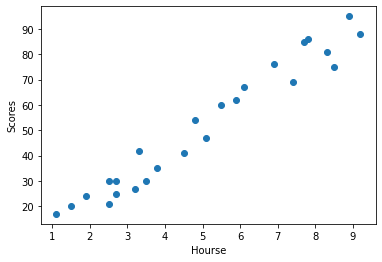

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')



*   X : Hours
*   Y : Scores

Tìm hàm $\hat{Y} = aX + b $ 

Với a, b sao cho trung bình của bình phương sai số nhỏ nhất.
Tức là:

$ \frac{1}{n} \sum (Y-\hat{Y})^2 = \frac{1}{n} (Y- aX - b)^2$ đạt giá trị nhỏ nhất (*)

Nghiệm của bài toán này:

Z là ma trận rộng của X thêm 1 cột toàn 1.

$(Z^TZ)^{-1}Z^TY$



In [ ]:
# Theo như công thức trên

In [ ]:
X = df['Hours'].values
X = X.reshape(-1, 1)
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
Y = df['Scores'].values
Y = Y.reshape(-1, 1)
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [ ]:
import numpy as np
Z = np.concatenate([X, np.ones((len(X), 1))], axis = -1)
Z

array([[2.5, 1. ],
       [5.1, 1. ],
       [3.2, 1. ],
       [8.5, 1. ],
       [3.5, 1. ],
       [1.5, 1. ],
       [9.2, 1. ],
       [5.5, 1. ],
       [8.3, 1. ],
       [2.7, 1. ],
       [7.7, 1. ],
       [5.9, 1. ],
       [4.5, 1. ],
       [3.3, 1. ],
       [1.1, 1. ],
       [8.9, 1. ],
       [2.5, 1. ],
       [1.9, 1. ],
       [6.1, 1. ],
       [7.4, 1. ],
       [2.7, 1. ],
       [4.8, 1. ],
       [3.8, 1. ],
       [6.9, 1. ],
       [7.8, 1. ]])

In [ ]:
# Nghiêm a,b của bài toán

np.matmul(np.matmul(np.linalg.inv(np.matmul(Z.T, Z)), Z.T), Y)

array([[9.77580339],
       [2.48367341]])

Hàm tìm được: 

$\hat{y} = 9.77580339 *X + 2.48367341$

Text(0, 0.5, 'Scores')

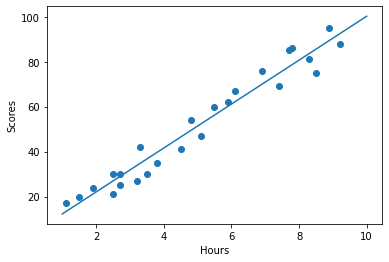

In [ ]:
# Check lại
import matplotlib.pyplot as plt
plt.scatter(df['Hours'], df['Scores'])
plt.plot(np.arange(1,11), 9.77580339 * np.arange(1,11) + 2.48367341)
plt.xlabel('Hours')
plt.ylabel('Scores')

In [ ]:
# (*)
np.mean(np.square(Y - 9.77580339*X - 2.48367341))

28.88273050924545

# Dùng Gradient Descent

Tiếp tục từ (*)

$ L = \frac{1}{n} \sum (Y-\hat{Y})^2 = \frac{1}{n} (Y- aX - b)^2$
L đạt giá trị nhỏ nhất

Đặt: $\lambda$ là learning rate.

a, b sẽ được cập nhật bằng công thức sau:

*   $a = a - \lambda \frac{\partial L}{\partial a} = a - \lambda \frac{2 (Y-aX-b)(-X)}{n}$
*   $b= b - \lambda \frac{\partial L}{\partial b} = b - \lambda \frac{2 (Y-aX-b) (-1)}{n}$

Điều kiện dừng:

1. Chạy cố định bao nhiêu vòng lặp.
2. Sai số giữa a,b với biến cập nhật mới của nó nhỏ hơn một số cho trước (10^-6). $abs(a - \bar{a}) < 10 ^{-6}$ hoặc $\frac{\bar{a}}{a} < 10^{-6}$
3. $abs(L(a,b) - L(\bar{a}, \bar{b})) < 10^{-6} $ hoặc $abs(\frac{L(\bar{a},\bar{b})}{L(a,b)})<10^{-6}$

Nên lúc nào cũng kèm theo đk 1.





In [ ]:
# Dựa trên để code

import numpy as np

# init
a = 1
b = 100
num_itr = 1000000 # Số vòng lặp
lr = 0.0001 # learing rate.

for itr in range(num_itr):
    a = a - lr * 2 * np.mean((Y - a* X -b )*(-X))
    b = b - lr * 2 * np.mean((Y - a* X -b )*(-1))

    if not itr % 100000:
        loss = np.mean(np.square(Y - a*X - b))
        print(f'{itr} iter : {loss}')

# final
loss = np.mean(np.square(Y - a*X - b))
print(f'{itr} iter : {loss}')

0 iter : 3346.4710560641315
100000 iter : 29.758170995437254
200000 iter : 28.88315115869294
300000 iter : 28.882730711367657
400000 iter : 28.882730509342586
500000 iter : 28.88273050924551
600000 iter : 28.88273050924546
700000 iter : 28.88273050924545
800000 iter : 28.882730509245466
900000 iter : 28.882730509245466
999999 iter : 28.882730509245466


In [ ]:
a,b

(9.775803390785839, 2.4836734053824854)

In [ ]:
from sys import breakpointhook
# Dựa trên để code thêm đk dừng 2,3

import numpy as np

# init
a = 1
b = 100
num_itr = 1000000 # Số vòng lặp
lr = 0.0001 # learing rate.
er = 10 ** (-6)

for itr in range(num_itr):
    a_update = a - lr * 2 * np.mean((Y - a* X -b )*(-X))
    b_update = b - lr * 2 * np.mean((Y - a* X -b )*(-1))

    # ĐK 2
    # if abs(a-a_update) < er and abs(b-b_update) < er:
    #     break
    
    # ĐK 3:
    if abs(np.mean(np.square(Y - a*X - b)) - np.mean(np.square(Y - a_update*X - b_update))) < er:
        loss = np.mean(np.square(Y - a*X - b))
        print(f'{itr - 1} iter : {loss}')
        break
    a = a_update 
    b = b_update 

    if not itr % 100000:
        loss = np.mean(np.square(Y - a*X - b))
        print(f'{itr} iter : {loss}')

# final
loss = np.mean(np.square(Y - a_update*X - b_update))
print(f'{itr} iter : {loss}')


0 iter : 3346.4664695930405
100000 iter : 29.759105180717814
155029 iter : 28.89582073094376
155030 iter : 28.895819730957392


In [ ]:
# iter 214975 là khi dùng đk 2
# iter 155030 là khi dùng đk 3.

Text(0, 0.5, 'Scores')

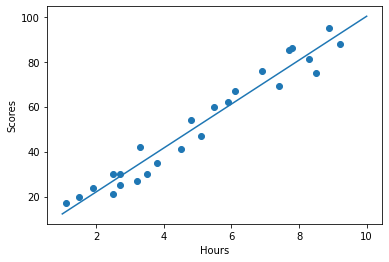

In [ ]:
# Check lại
import matplotlib.pyplot as plt
plt.scatter(df['Hours'], df['Scores'])
plt.plot(np.arange(1,11), 9.775803390785839 * np.arange(1,11) + 2.4836734053824854)
plt.xlabel('Hours')
plt.ylabel('Scores')

# Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(X,Y)


In [ ]:
# Nghiệm
LR.coef_, LR.intercept_


(array([[9.77580339]]), array([2.48367341]))

Text(0, 0.5, 'Scores')

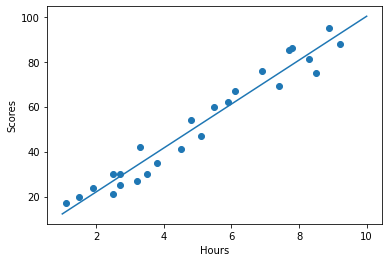

In [ ]:
# Check lại
import matplotlib.pyplot as plt
plt.scatter(df['Hours'], df['Scores'])
plt.plot(np.arange(1,11), 9.775803390787468 * np.arange(1,11) + 2.48367340537321)
plt.xlabel('Hours')
plt.ylabel('Scores')


In [ ]:
np.mean(np.square(Y - 9.775803390787468*X - 2.48367340537321))

28.882730509245462

# Bài tập

In [ ]:
# 1. Cho dataset housing.csv
# # Dự đoán median_house_value trong dataset trên.
# # Columns X: 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'
# # Columns Y: median_house_value
# 2. Phát biểu bài toán
# 3. Giải bằng LinearRegression bằng cả 3 cách trên. (Nghiêm, Gradient, SKlearn)
# 4. So sánh Loss của 3 cách.
# 5. Vẽ cả 3 cái trên 1 biểu đồ.